# Curating a data set for elastic $(p,p)$ and $(n,n)$ scattering for multiple isotopes

 We will make use of the class `MulltiQuantityReactionData` class in `exfor_tools.curate`

In [1]:
import numpy as np
from periodictable import elements

from exfor_tools import curate, quantities, reaction

Using database version X4-2024-12-31 located in: /home/beyerk/db/exfor/unpack_exfor-2024/X4-2024-12-31


In [2]:
print(quantities)

['dXS/dA', 'dXS/dRuth', 'Ay']


In [3]:
Ca48 = (48, 20)
Ca40 = (40, 20)

neutron = (1, 0)
proton = (1, 1)

In [4]:
energy_range = [10, 200]
min_num_points = 5

# if normalization uncertainty isn't reported assign it to be 5%
default_systematic_normalization_err = 0.05

settings = {
    "Einc_range": energy_range,
    "filter_kwargs": {"min_num_pts": min_num_points},
}

## EXFOR querying and parsing

In [5]:
pp_data = dict(
    [
        (
            target,
            curate.MulltiQuantityReactionData(
                reaction.ElasticReaction(target=target, projectile=proton),
                quantities=["dXS/dA", "dXS/dRuth"],
                settings=settings,
                vocal=True,
            ),
        )
        for target in [Ca40, Ca48]
    ]
)


Now parsing dXS/dA for 40-Ca(p,el)

Found subentry C0076002 with the following columns:
['E-RSL', 'EN', 'ANG-CM', 'DATA-CM', 'ERR-S']
Found subentry C0078002 with the following columns:
['EN-ERR', 'EN-RSL-FW', 'EN', 'ANG-CM', 'DATA-CM', 'ERR-T']
Found subentry C0624002 with the following columns:
['EN-ERR', 'ERR-SYS', 'ERR-7', 'ERR-9', 'EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Failed to parse subentry C0624002:
	Ambiguous statistical error labels:
ERR-SYS, ERR-7, ERR-9, DATA-ERR
Found subentry C0893002 with the following columns:
['EN', 'ANG-CM', 'DATA-CM', 'ERR-S']
Found subentry E0166012 with the following columns:
['EN', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry E0249002 with the following columns:
['EN', 'POL-BM-MIN', 'POL-BM-MAX', 'E-RSL', 'ANG-ERR', 'ANG-CM', 'ANG-RSL', 'DATA-CM', 'DATA-ERR']
Found subentry E0795002 with the following columns:
['EN', 'ANG-CM', 'DATA']
Found subentry O0032002 with the following columns:
['EN', 'ANG-CM', 'DATA', 'ERR-S']
Found subentr

In [6]:
nn_data = dict(
    [
        (
            target,
            curate.MulltiQuantityReactionData(
                reaction.ElasticReaction(target=target, projectile=neutron),
                quantities=["dXS/dA"],
                settings=settings,
                vocal=True,
            ),
        )
        for target in [Ca40, Ca48]
    ]
)


Now parsing dXS/dA for 40-Ca(n,el)

Found subentry 12785002 with the following columns:
['EN', 'EN-RSL', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry 12996002 with the following columns:
['EN', 'EN-RSL', 'ANG-CM', 'DATA', 'DATA-ERR']
Found subentry 13946003 with the following columns:
['EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'ERR-S', 'ERR-SYS']
Found subentry 14303002 with the following columns:
['EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry 14303003 with the following columns:
['EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']

Succesfully parsed 4 entries
Failed to parse 0 entries:


Now parsing dXS/dA for 48-Ca(n,el)

Found subentry 14303004 with the following columns:
['EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry 14303005 with the following columns:
['EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']

Succesfully parsed 1 entries
Failed to parse 0 entries:



Wow, that's a lot of information! 

## Let's step through the failed parses one by one:

### $^{48}$Ca

### failed parses

In [7]:
curate.print_failed_parses(nn_data[Ca48].data["dXS/dA"].failed_parses)

In [8]:
curate.print_failed_parses(pp_data[Ca48].data["dXS/dRuth"].failed_parses)

In [9]:
curate.print_failed_parses(pp_data[Ca48].data["dXS/dA"].failed_parses)

Entry: C0624
C0624005  :  Ambiguous statistical error labels:
ERR-SYS, ERR-7, ERR-9, DATA-ERR
ERR-ANALYS (DATA-ERR) Relative uncertainty.
           (ERR-S,,1.) Statistical uncertainty <1%.
            Systematic uncertainties:
           (ERR-1,,1.) Dead time correction                 <1.0%
           (ERR-2,,0.1)  Correction for reaction losses
                                                 in NaI(Tl) <0.1%
           (ERR-3,,0.3)  Finite geometry correction         <0.3%
           (ERR-4,,1.)  Detector angle                      <1.0%
           (ERR-5,,1.5)  Incident proton energy             <1.5%
           (ERR-6,,2.)  Impurity subtraction - worst case    2.0%
           (ERR-SYS) Uncertainty in the absolute scale includes:
           (ERR-7) Uncertainty in the detector solid angle
           (ERR-8,,1.) Uncertainty in the target rotation angle
           (ERR-9) Uncertainty in the beam current integration
            * Uncertainty in the target thickness



In [10]:
pp_data[Ca48].data["dXS/dA"].reattempt_parse(
    "C0624",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["ERR-SYS"],
    },
)

Found subentry C0624005 with the following columns:
['EN-ERR', 'ERR-SYS', 'ERR-7', 'ERR-9', 'EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']


### plotting

(-5.0, 220.0)

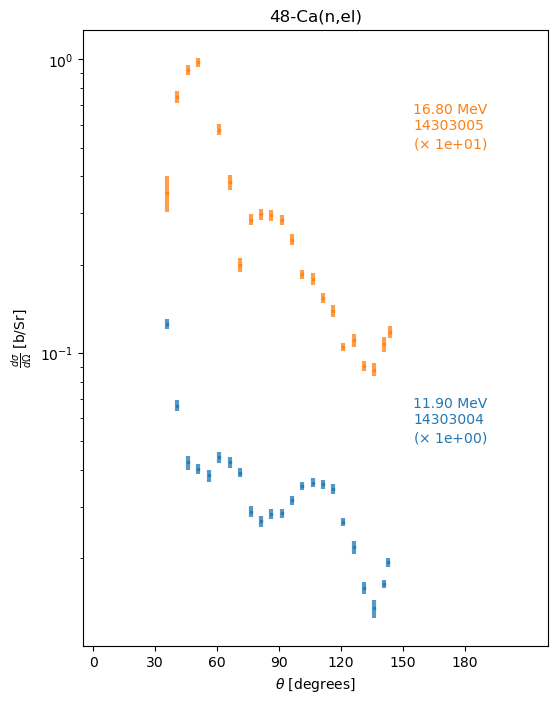

In [11]:
axes = (
    nn_data[Ca48]
    .data["dXS/dA"]
    .plot(
        label_kwargs={"label_exfor": True, "label_offset_factor": 0.05},
        plot_kwargs={"offsets": 10},
        y_size=8,
    )
)
axes[0].set_xlim([-5, 220])

(-5.0, 220.0)

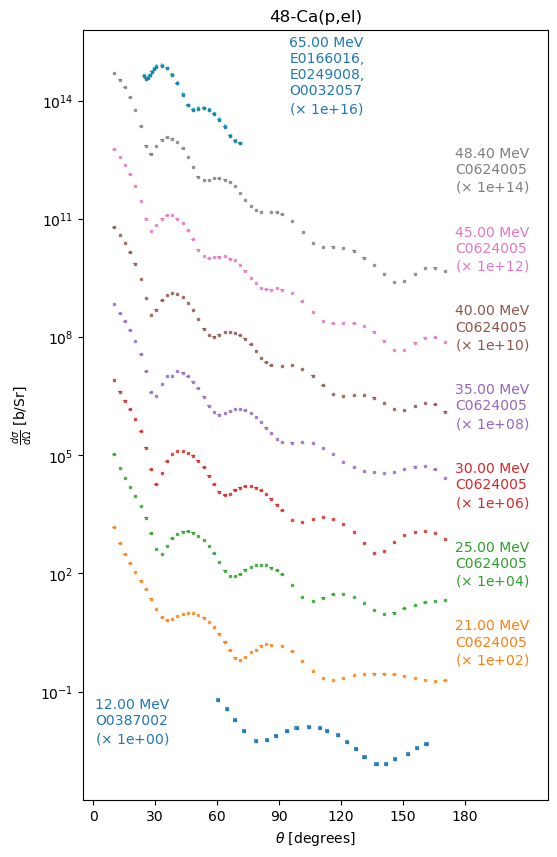

In [12]:
axes = (
    pp_data[Ca48]
    .data["dXS/dA"]
    .plot(
        label_kwargs={"label_exfor": True, "label_offset_factor": 0.005},
        plot_kwargs={"offsets": 100},
    )
)
axes[0].set_xlim([-5, 220])

(-20.0, 220.0)

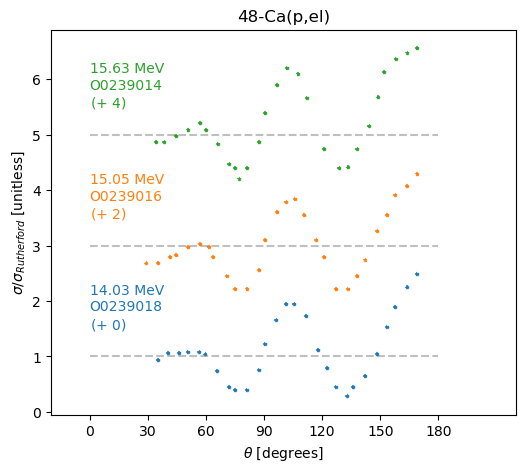

In [13]:
axes = (
    pp_data[Ca48]
    .data["dXS/dRuth"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 1.5,
            "label_xloc_deg": 0,
        },
        plot_kwargs={
            "offsets": 2,
            "log": False,
            "draw_baseline": True,
            "baseline_offset": 1,
        },
        y_size=5,
    )
)
axes[0].set_xlim([-20, 220])

## $^{40}$Ca

### handling failed parses

In [14]:
curate.print_failed_parses(nn_data[Ca40].data["dXS/dA"].failed_parses)

In [15]:
curate.print_failed_parses(pp_data[Ca40].data["dXS/dRuth"].failed_parses)

Entry: E1677
E1677016  :  negative errors under label -DATA-ERR!
ERR-ANALYS (DATA-ERR) No information on source of uncertainties.
ERR-ANALYS (ERR-S,,5.) Statistical error <5%
Entry: O0211
O0211004  :  Ambiguous statistical error labels:
DATA-ERR, ERR-T

ERR-ANALYS (ERR-T).The Uncertainty is Reported by Authors.
           (DATA-ERR).Data-Point Reader Uncertainty.
           (ANG-ERR).Data-Point Reader Uncertainty.
Entry: O0253
O0253017  :  Ambiguous statistical error labels:
ERR-1, ERR-2, ERR-3, ERR-DIG
ERR-ANALYS (ERR-1) Relative uncertainties
           (ERR-2) Absolute uncertainty
           (ERR-3) the uncertainty in the corrections for carbon
           and oxygen at forward angles

Entry: O0302
O0302004  :  Ambiguous statistical error labels:
DATA-ERR1, DATA-ERR2, ERR-DIG
ERR-ANALYS  The statistical error varied from 1 % at
            small angles to 4 % at 50 degrees.
           (DATA-ERR1) The overall error was calculated to
            be +/- 5% for the relative cross section

In [16]:
pp_data[Ca40].data["dXS/dRuth"].reattempt_parse(
    "E1677",
    parsing_kwargs={
        "statistical_err_labels": ["+DATA-ERR", "-DATA-ERR"],
        "statistical_err_treatment": "difference",
    },
)

Found subentry E1677016 with the following columns:
['EN', 'ANG-CM', 'DATA', '+DATA-ERR', '-DATA-ERR']
Failed to parse subentry E1677016:
	negative errors under label -DATA-ERR!
Reattempt parse failed


In [17]:
pp_data[Ca40].data["dXS/dRuth"].reattempt_parse(
    "O0211",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR", "ERR-T"],
    },
)

Found subentry O0211004 with the following columns:
['EN', 'EN-RSL', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA', 'ERR-T']


In [18]:
pp_data[Ca40].data["dXS/dRuth"].reattempt_parse(
    "O0253",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-1", "ERR-DIG"],
        "systematic_err_labels": ["ERR-2"],
    },
)

Found subentry O0253017 with the following columns:
['EN-ERR', 'ERR-1', 'ERR-2', 'ERR-3', 'ANG-ERR-D', 'ERR-DIG', 'EN', 'ANG-CM', 'DATA']


In [19]:
pp_data[Ca40].data["dXS/dRuth"].reattempt_parse(
    "O0302",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR1", "ERR-DIG"],
        "systematic_err_labels": ["DATA-ERR2"],
    },
)

Found subentry O0302004 with the following columns:
['EN', 'DATA-ERR1', 'DATA-ERR2', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA']


In [20]:
del pp_data[Ca40].data["dXS/dRuth"].entries["E0120"]  # no errors reported

In [21]:
curate.print_failed_parses(pp_data[Ca40].data["dXS/dA"].failed_parses)

Entry: C0624
C0624002  :  Ambiguous statistical error labels:
ERR-SYS, ERR-7, ERR-9, DATA-ERR
ERR-ANALYS (DATA-ERR) Relative uncertainty.
           (ERR-S,,1.) Statistical uncertainty <1%.
            Systematic uncertainties:
           (ERR-1,,1.) Dead time correction                 <1.0%
           (ERR-2,,0.1)  Correction for reaction losses
                                                 in NaI(Tl) <0.1%
           (ERR-3,,0.3)  Finite geometry correction         <0.3%
           (ERR-4,,1.)  Detector angle                      <1.0%
           (ERR-5,,1.5)  Incident proton energy             <1.5%
           (ERR-6,,2.)  Impurity subtraction - worst case    2.0%
           (ERR-SYS) Uncertainty in the absolute scale includes:
           (ERR-7) Uncertainty in the detector solid angle
           (ERR-8,,1.) Uncertainty in the target rotation angle
           (ERR-9) Uncertainty in the beam current integration
            * Uncertainty in the target thickness

Entry: O0049
O0049

In [22]:
pp_data[Ca40].data["dXS/dA"].reattempt_parse(
    "C0624",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["ERR-SYS"],
    },
)

Found subentry C0624002 with the following columns:
['EN-ERR', 'ERR-SYS', 'ERR-7', 'ERR-9', 'EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']


In [23]:
pp_data[Ca40].data["dXS/dA"].reattempt_parse(
    "O0049",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-DIG", "ERR-T"],
        "systematic_err_labels": ["MONIT-ERR"],
    },
)

Found subentry O0049004 with the following columns:
['EN', 'ANG-NRM', 'MONIT', 'MONIT-ERR', 'ERR-T', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA-CM']


In [24]:
pp_data[Ca40].data["dXS/dA"].reattempt_parse(
    "O0142",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-T"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0142004 with the following columns:
['EN', 'ERR-1', 'ANG-CM', 'DATA-CM', 'ERR-T']


In [25]:
pp_data[Ca40].data["dXS/dA"].reattempt_parse(
    "O0208",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-2"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0208006 with the following columns:
['EN', 'ERR-1', 'ANG-ERR', 'ANG-CM', 'DATA-CM', 'ERR-2']


In [26]:
pp_data[Ca40].data["dXS/dA"].reattempt_parse(
    "O0253",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-1", "ERR-DIG"],
        "systematic_err_labels": ["ERR-2"],
    },
)

Found subentry O0253002 with the following columns:
['EN-ERR', 'ERR-1', 'ERR-2', 'ERR-3', 'ANG-ERR-D', 'ERR-DIG', 'EN', 'ANG-CM', 'DATA-CM']


In [27]:
pp_data[Ca40].data["dXS/dA"].reattempt_parse(
    "O0382",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-T", "DATA-ERR"],
    },
)

Found subentry O0382002 with the following columns:
['EN', 'EN-RSL-FW', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA-CM', 'ERR-T']


In [28]:
pp_data[Ca40].data["dXS/dA"].reattempt_parse(
    "T0101",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["DATA-ERR1"],
    },
)

Found subentry T0101002 with the following columns:
['DATA-ERR1', 'EN', 'ANG-CM', 'DATA', 'DATA-ERR']


### plotting and checking for data sets to be excluded

(-20.0, 30.0)

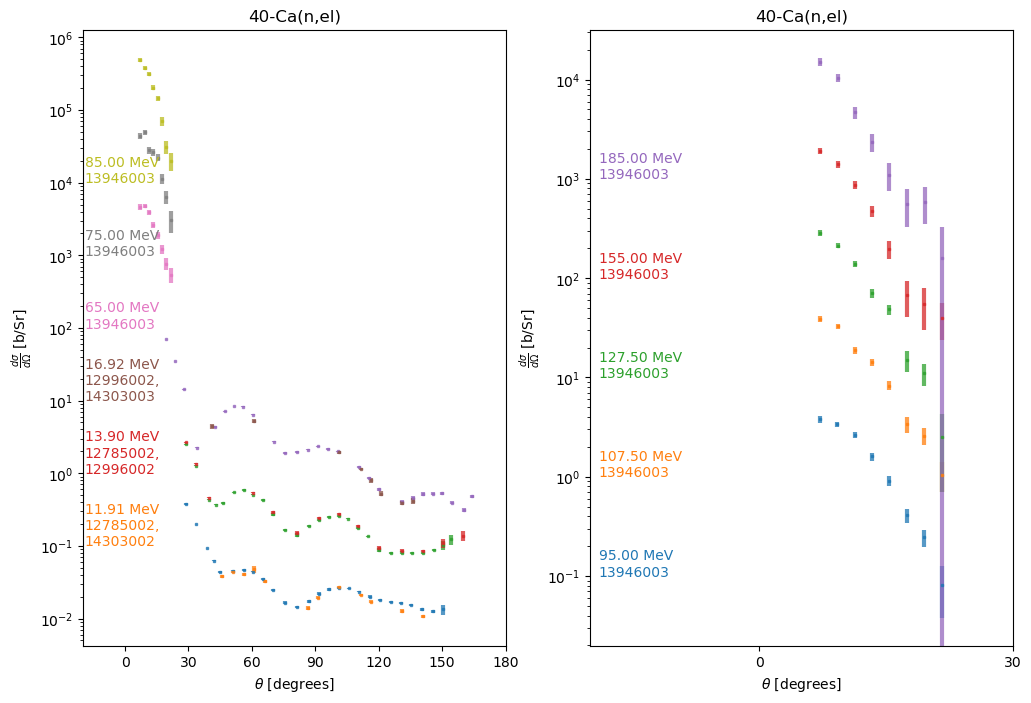

In [29]:
axes = (
    nn_data[Ca40]
    .data["dXS/dA"]
    .plot(
        n_per_plot=6,
        label_kwargs={
            "label_xloc_deg": -19,
            "label_offset_factor": 0.1,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
        plot_kwargs={"offsets": 10},
        y_size=8,
    )
)
axes[0].set_xlim([-20, 180])
axes[1].set_xlim([-20, 30])

[(-5.0, 220.0), (-5.0, 220.0), (-5.0, 220.0), (-5.0, 220.0)]

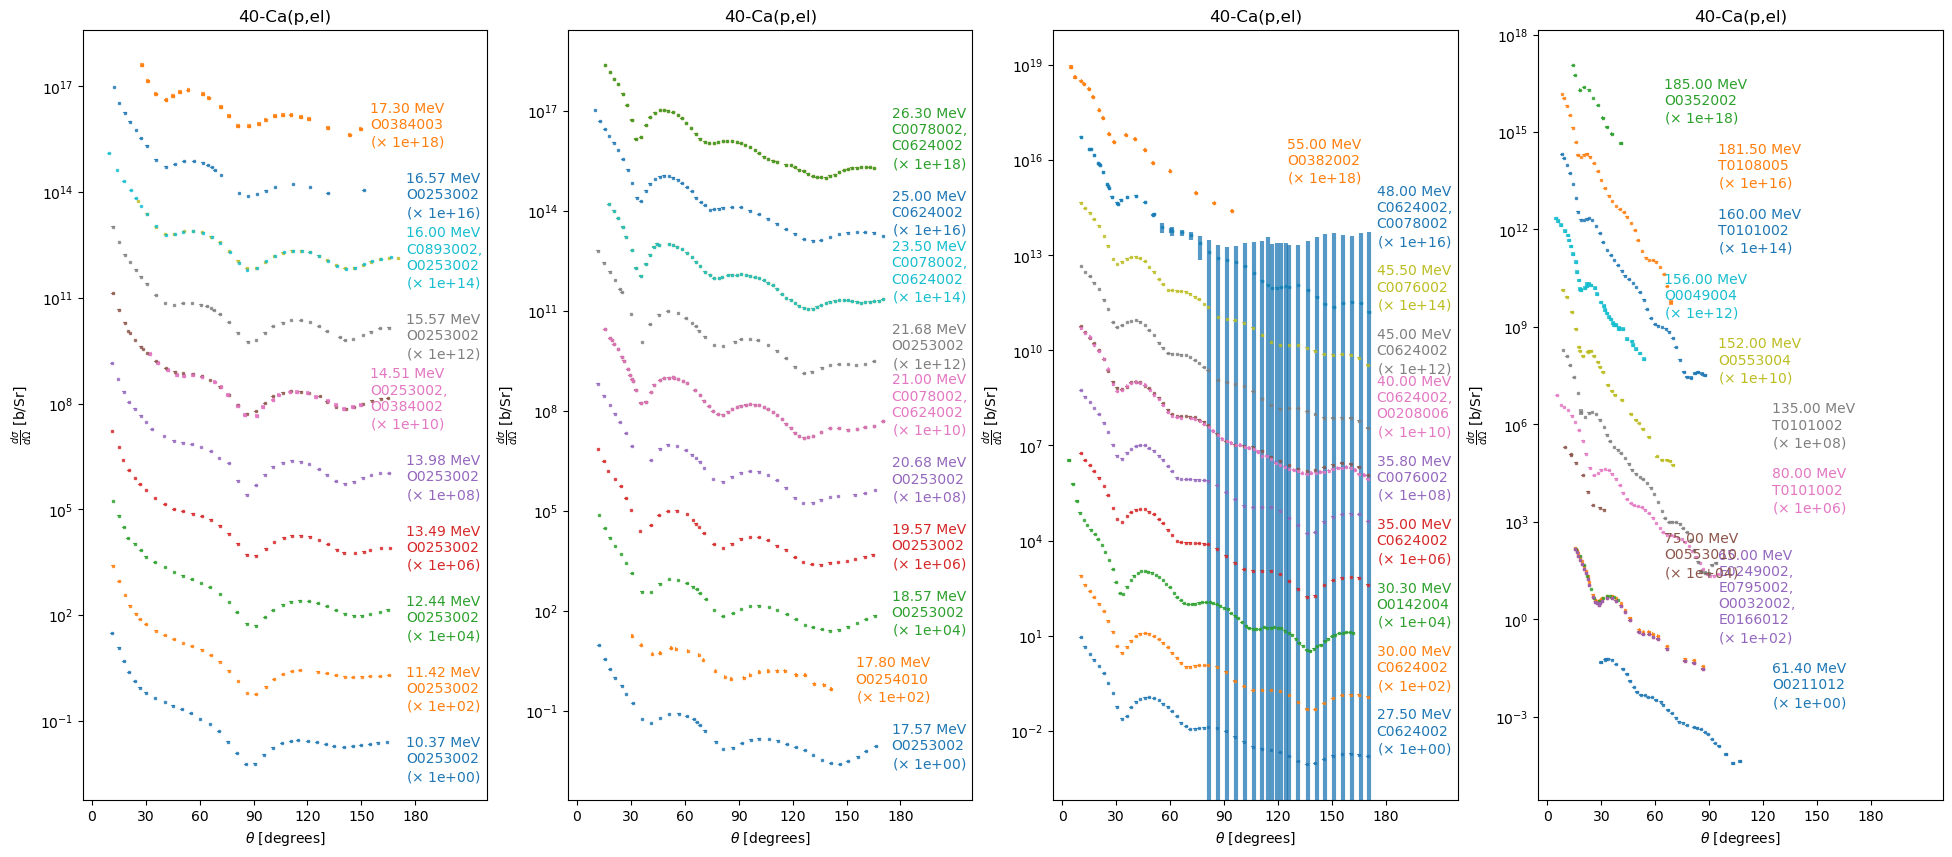

In [30]:
axes = (
    pp_data[Ca40]
    .data["dXS/dA"]
    .plot(
        n_per_plot=10,
        label_kwargs={
            "label_xloc_deg": None,
            "label_offset_factor": 0.002,
            "label_offset": True,
            "label_exfor": True,
        },
        plot_kwargs={"offsets": 100},
        y_size=10,
    )
)
[a.set_xlim([-5, 220]) for a in axes]

In [31]:
# Exclusions:
del pp_data[Ca40].data["dXS/dA"].entries["C0078"]  # redundant, huge uncertainties
del pp_data[Ca40].data["dXS/dA"].entries["E0795"]  # duplicate, no uncertainties
del pp_data[Ca40].data["dXS/dA"].entries["O0032"]  # duplicate to E0166 and E0249
del pp_data[Ca40].data["dXS/dA"].entries["E0249"]  # duplicate to E0166 and O0032
del pp_data[Ca40].data["dXS/dA"].entries["O0253"]
# duplicate to Rutherford from same entry, some data shows Compound Elastic effects per original paper

[(-5.0, 220.0), (-5.0, 220.0), (-5.0, 220.0)]

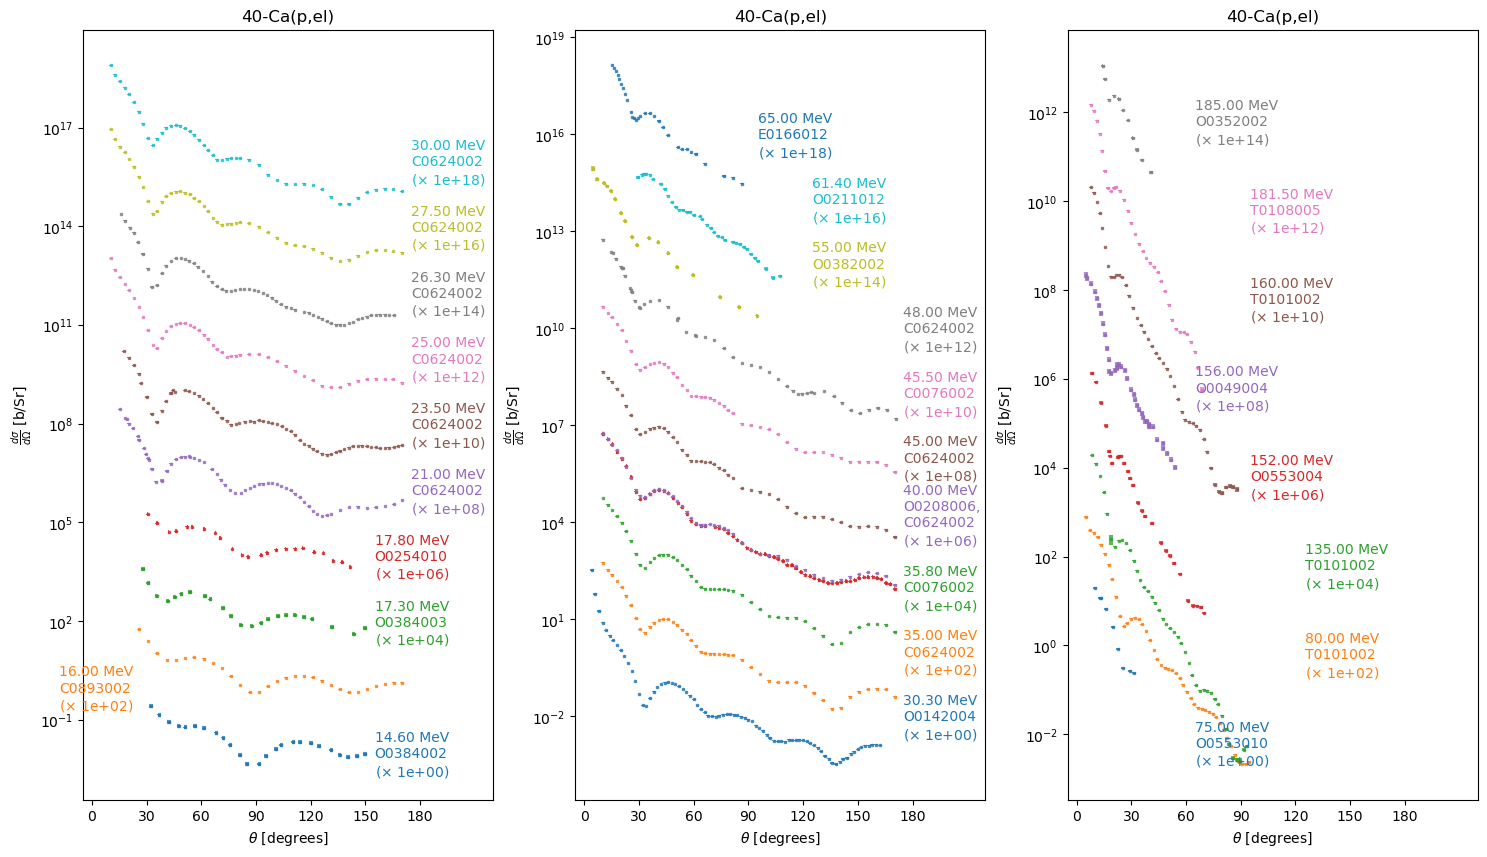

In [32]:
axes = (
    pp_data[Ca40]
    .data["dXS/dA"]
    .plot(
        n_per_plot=10,
        label_kwargs={
            "label_xloc_deg": None,
            "label_offset_factor": 0.002,
            "label_offset": True,
            "label_exfor": True,
        },
        plot_kwargs={"offsets": 100},
        y_size=10,
    )
)
[a.set_xlim([-5, 220]) for a in axes]

[(-5.0, 220.0), (-5.0, 220.0)]

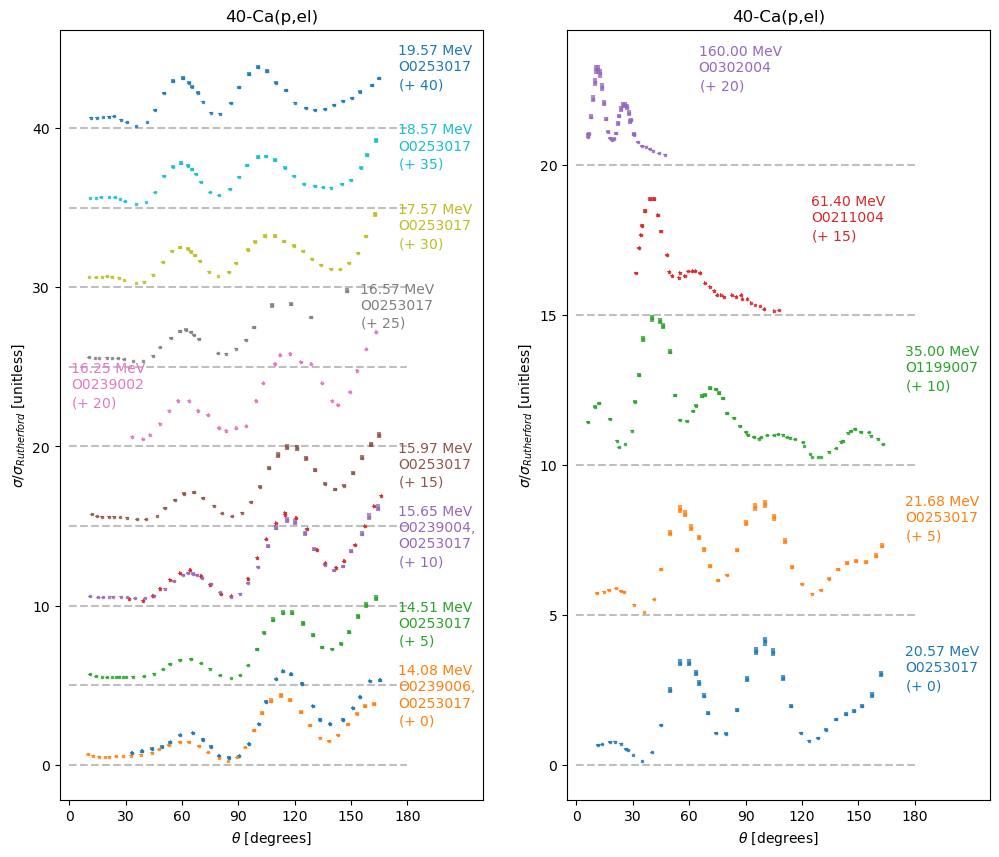

In [33]:
axes = (
    pp_data[Ca40]
    .data["dXS/dRuth"]
    .plot(
        n_per_plot=9,
        label_kwargs={
            "label_xloc_deg": None,
            "label_offset_factor": 2.5,
            "label_offset": True,
            "label_exfor": True,
        },
        plot_kwargs={"offsets": 5, "log": False, "draw_baseline": True},
        y_size=10,
    )
)
[a.set_xlim([-5, 220]) for a in axes]

## Now let's take a look at some attributes of the data


Now that we've removed outliers and fixed failed parses, we should re-cross-reference by entry and re-count the total number of data points:

In [34]:
for quantity, data in pp_data.items():
    data.post_process_entries()
for quantity, data in nn_data.items():
    data.post_process_entries()

(40,20): found duplicates between (p,p) absolute and ratio to Rutherford in O0211
[61.4]
[61.4]


We can see how many data points and measurements we have:

In [35]:
for quantity, data in pp_data.items():
    print(quantity, data.num_data_pts, data.num_measurements)

(40, 20) {'dXS/dA': 1148, 'dXS/dRuth': 558} {'dXS/dA': 28, 'dXS/dRuth': 16}
(48, 20) {'dXS/dA': 431, 'dXS/dRuth': 82} {'dXS/dA': 11, 'dXS/dRuth': 3}


In [36]:
for quantity, data in nn_data.items():
    print(quantity, data.num_data_pts, data.num_measurements)

(40, 20) {'dXS/dA': 178} {'dXS/dA': 14}
(48, 20) {'dXS/dA': 45} {'dXS/dA': 2}


By cross-referencing by entry, we can see what the common systematic errors are for single experiments with multiple isotopes, energies, quantities, etc., which can be very useful in evaluation, calibration and UQ.

If we were to construct a likelihood function for calibrating to this data, we would have to consider the correlations in normalization between data sets from the same entry,(making the assumption that each subentry within an entry shares the same systematic error in the normalization):

In [37]:
all_data = list(pp_data.values()) + list(nn_data.values())
all_data_by_entry, sys_uncertainties_by_entry = (
    curate.cross_reference_entry_systematic_err(all_data)
)

In [38]:
all_data_by_entry

{'C0076': [<exfor_tools.exfor_entry.ExforEntry at 0x779ca4bac310>],
 'C0893': [<exfor_tools.exfor_entry.ExforEntry at 0x779ca3c53f90>],
 'E0166': [<exfor_tools.exfor_entry.ExforEntry at 0x779ca3b75890>,
 'O0254': [<exfor_tools.exfor_entry.ExforEntry at 0x779ca49721d0>],
 'O0352': [<exfor_tools.exfor_entry.ExforEntry at 0x779ca3ba8690>],
 'O0384': [<exfor_tools.exfor_entry.ExforEntry at 0x779ca3881ed0>],
 'O0553': [<exfor_tools.exfor_entry.ExforEntry at 0x779ca4994f90>],
 'T0108': [<exfor_tools.exfor_entry.ExforEntry at 0x779ca4571b50>],
 'C0624': [<exfor_tools.exfor_entry.ExforEntry at 0x779ca3c13490>,
 'O0049': [<exfor_tools.exfor_entry.ExforEntry at 0x779ca2e02f10>],
 'O0142': [<exfor_tools.exfor_entry.ExforEntry at 0x779ca2b397d0>],
 'O0208': [<exfor_tools.exfor_entry.ExforEntry at 0x779ca26c3f90>],
 'O0382': [<exfor_tools.exfor_entry.ExforEntry at 0x779ca3f8e610>],
 'T0101': [<exfor_tools.exfor_entry.ExforEntry at 0x779ca1dac590>],
 'O0239': [<exfor_tools.exfor_entry.ExforEntry at 

In [39]:
sys_uncertainties_by_entry

{'C0076': [0.0, 0.0],
 'C0893': [0.0],
 'E0166': [0.0, 0.0],
 'O0254': [0.0],
 'O0352': [0.0],
 'O0384': [0.0, 0.0],
 'O0553': [0.0, 0.0],
 'T0108': [0.0],
 'C0624': [0.03,
  0.030000000000000002,
  0.030000000000000002,
  0.03,
  0.03,
  0.030000000000000002,
  0.03,
  0.03,
  0.030000000000000006,
  0.03,
  0.030000000000000002,
  0.03,
  0.03,
  0.03,
  0.030000000000000002,
  0.03,
  0.030000000000000002],
 'O0049': [0.0],
 'O0142': [0.030000000000000002],
 'O0208': [0.05],
 'O0382': [0.0],
 'T0101': [0.1, 0.1, 0.1],
 'O0239': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'O1199': [0.0],
 'O0211': [0.0],
 'O0253': [0.049999999999999996,
  0.049999999999999996,
  0.05,
  0.05,
  0.049999999999999996,
  0.05000000000000001,
  0.05,
  0.049999999999999996,
  0.049999999999999996,
  0.05],
 'O0302': [0.07],
 'E0249': [0.0],
 'O0032': [0.0],
 'O0387': [0.0],
 '12785': [0.0, 0.0],
 '12996': [0.0, 0.0],
 '13946': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 '14303': [0.0, 0.0, 0.0, 0.0]}

We can write our data to disk:

In [40]:
import pickle

with open("calcium_pp_elastic_data.pkl", "wb") as f:
    pickle.dump(pp_data, f)